# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [2]:
#Reading the tweet archive csv file
WeRateDogs_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
WeRateDogs_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
#using request lirbrary to retrieve the image prediction dataset
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
# response.status_code

with open("image_prediction.tsv", mode ='wb') as file:
    file.write(response.content)
   

In [5]:
image_predictions = pd.read_csv("image_prediction.tsv", sep = '\t')

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [14]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'JcaS1fl6SezK5e7yKc6G52hpP'
consumer_secret = '3EvZNsUzWLYdO7NBWZNPZrDRYlstvdPvt9pKY7BXD7APCj6xUC'
access_token = '3092365816-4I7GH5RgaJaQze83RdQyETL42poFnWyI6dubyy8'
access_secret = 'JrGVgrvpFgrUImsi3MQfZIVOxysfC4E5yFMBBPunV5ptR'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

api

In [15]:
#Let's get all the values of the twitter ids, and we will check the 
#length to make sure there is no missing value
all_tweet_ids = WeRateDogs_twitter_archive.tweet_id.values
len(all_tweet_ids)

2356

In [16]:
#lets create empty list to count our available and missing tweets based on the tweet archive
start = timer()
missing_tweets = []
available_tweets = []

In [18]:
#Lets get all the tweets using the twitter ID and save it in tweet_json file
with open('tw_json.txt', 'w') as outfile:
    for t_id in all_tweet_ids:
        try:
            tweet = api.get_status(t_id)
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            available_tweets.append(t_id)
        except Exception as e:
            missing_tweets.append(t_id)
            pass
end = timer()

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


In [19]:
len(missing_tweets)

29

In [25]:
tweet_list = []
#open the file to read from it
with open('tw_json.txt', 'r', encoding = 'utf-8') as json_file:
    for line in json_file:
        tweet_line = json.loads(line)
        # Append to list of dictionaries
        tweet_list.append({'tweet_id': tweet_line['id'],
                        'retweet_count': tweet_line['retweet_count'],
                        'favorite_count': tweet_line['favorite_count'],
                       })

#Lets Create a DataFrame with tweet ID, retweet count and favorite count
tweets_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])



In [26]:
#Lets checkout what we have
tweets_df

tweet_id  retweet_count  favorite_count
0     892420643555336193           6961           33635
1     892177421306343426           5266           29179
2     891815181378084864           3463           21949
3     891689557279858688           7183           36743
4     891327558926688256           7707           35101
5     891087950875897856           2580           17704
6     890971913173991426           1644           10307
7     890729181411237888          15664           56543
8     890609185150312448           3599           24396
9     890240255349198849           6059           27800
10    890006608113172480           6104           26910
11    889880896479866881           4136           24446
12    889665388333682689           8293           41819
13    889638837579907072           3695           23533
14    889531135344209921           1873           13282
15    889278841981685760           4414           21965
16    888917238123831296           3739           25475
17    888804989199671297           3508           22345
18    888554962724278272           2859           17225
19    888078434458587136           2881           19069
20    887705289381826560           4513           26471
21    887517139158093824           9801           40503
22    887473957103951883          14940           59861
23    887343217045368832           8766           29458
24    887101392804085760           4965           26841
25    886983233522544640           6280           30191
26    886736880519319552           2609           10448
27    886680336477933568           3717           19622
28    886366144734445568           2609           18455
29    886267009285017600              4             105
...                  ...            ...             ...
2297  666411507551481857            261             370
2298  666407126856765440             30              93
2299  666396247373291520             68             147
2300  666373753744588802             73             162
2301  666362758909284353            463             647
2302  666353288456101888             56             178
2303  666345417576210432            121             242
2304  666337882303524864             79             168
2305  666293911632134144            288             425
2306  666287406224695296             55             123
2307  666273097616637952             66             151
2308  666268910803644416             38              98
2309  666104133288665088           5451           12825
2310  666102155909144576             11              66
2311  666099513787052032             53             134
2312  666094000022159362             63             141
2313  666082916733198337             37              92
2314  666073100786774016            129             273
2315  666071193221509120             50             127
2316  666063827256086533            180             395
2317  666058600524156928             47              99
2318  666057090499244032            111             247
2319  666055525042405380            196             366
2320  666051853826850816            697            1023
2321  666050758794694657             50             115
2322  666049248165822465             36              88
2323  666044226329800704            114             245
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2279

[2327 rows x 3 columns]

In [27]:
#Save data to a new csv file so its easier to read from
tweets_df.to_csv('tw_json.csv')

In [21]:
#read data from saved file
tw_json = pd.read_csv('tw_json.csv')

In [22]:
#Since we didnt give index = false when we were saving, we need to drop this index after reading the file
tw_json.drop('Unnamed: 0', axis=1, inplace = True)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Lets analyze tweet archive 

In [10]:
#Checkout tweet archive
WeRateDogs_twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [11]:
#How many null values do we have
sum(WeRateDogs_twitter_archive["in_reply_to_status_id"].isnull())

2278

In [12]:
sum(WeRateDogs_twitter_archive["in_reply_to_user_id"].isnull())

2278

In [13]:
WeRateDogs_twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
WeRateDogs_twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [15]:
WeRateDogs_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# we have no duplicated values in the tweet archive
WeRateDogs_twitter_archive.duplicated().sum()

0

In [17]:
WeRateDogs_twitter_archive["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

#### Now lets analyze image predictions

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
image_predictions.duplicated().sum()

0

In [21]:
image_predictions.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

#### Analyzing tw_json

In [22]:
tw_json

tweet_id  retweet_count  favorite_count
0     892420643555336193           6961           33635
1     892177421306343426           5266           29179
2     891815181378084864           3463           21949
3     891689557279858688           7183           36743
4     891327558926688256           7707           35101
5     891087950875897856           2580           17704
6     890971913173991426           1644           10307
7     890729181411237888          15664           56543
8     890609185150312448           3599           24396
9     890240255349198849           6059           27800
10    890006608113172480           6104           26910
11    889880896479866881           4136           24446
12    889665388333682689           8293           41819
13    889638837579907072           3695           23533
14    889531135344209921           1873           13282
15    889278841981685760           4414           21965
16    888917238123831296           3739           25475
17    888804989199671297           3508           22345
18    888554962724278272           2859           17225
19    888078434458587136           2881           19069
20    887705289381826560           4513           26471
21    887517139158093824           9801           40503
22    887473957103951883          14940           59861
23    887343217045368832           8766           29458
24    887101392804085760           4965           26841
25    886983233522544640           6280           30191
26    886736880519319552           2609           10448
27    886680336477933568           3717           19622
28    886366144734445568           2609           18455
29    886267009285017600              4             105
...                  ...            ...             ...
2297  666411507551481857            261             370
2298  666407126856765440             30              93
2299  666396247373291520             68             147
2300  666373753744588802             73             162
2301  666362758909284353            463             647
2302  666353288456101888             56             178
2303  666345417576210432            121             242
2304  666337882303524864             79             168
2305  666293911632134144            288             425
2306  666287406224695296             55             123
2307  666273097616637952             66             151
2308  666268910803644416             38              98
2309  666104133288665088           5451           12825
2310  666102155909144576             11              66
2311  666099513787052032             53             134
2312  666094000022159362             63             141
2313  666082916733198337             37              92
2314  666073100786774016            129             273
2315  666071193221509120             50             127
2316  666063827256086533            180             395
2317  666058600524156928             47              99
2318  666057090499244032            111             247
2319  666055525042405380            196             366
2320  666051853826850816            697            1023
2321  666050758794694657             50             115
2322  666049248165822465             36              88
2323  666044226329800704            114             245
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2279

[2327 rows x 3 columns]

In [23]:
#checking for missing data and datatype
tw_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [24]:
#Cchecking for duplicates
tw_json.duplicated().sum()

0

### Quality issues
1. 'WeRateDogs_twitter_archive' table, some columns have duplicates(i.e retweet columns) which is unnecessary: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp"
2. Delete null rows on  'WeRateDogs_twitter_archive' table (expanded_urls). 

3. 'Source' column in 'WeRateDogs_twitter_archive' table has html a tag

4. 'WeRateDogs_twitter_archive' table has wrong datatypes: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id (should be integers), retweeted_status_timestamp (should be datetime)

5. The 'rating numerator' column in 'WeRateDogs_twitter_archive' table has some very huge values

6. The 'rating denominator' column in 'WeRateDogs_twitter_archive' table has other values other than '10'

7. Some dog names in 'WeRateDogs_twitter_archive' table have article names such as 'a', 'an', 'the'

8. Not all "WeRateDogs_twitter_archive" have "image predictions"


### Tidiness issues
1. 'WeRateDogs_twitter_archive' table has duplicate/unecessary dog "stage" columns (i.e. doggo, floofer, pupper, and puppo). They can all be in a single column

2. Dublicate tables, we can combine 'tw_json' table with 'WeRateDogs_twitter_archive'. Note that 'tw_json' table has 29 rows less, so address this issue

3. Create a 'breed' column in 'image_predictions' table and join it with 'WeRateDogs_twitter_archive' table to avoid duplicates. 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
WeRateDogs_twitter_archive_copy = WeRateDogs_twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tw_json_copy = tw_json.copy()

### Issue #1:  'WeRateDogs_twitter_archive' table, some columns have duplicates(i.e retweet columns) which is unnecessary: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp"

#### Define: Let's drop these columns

#### Code

In [24]:
#Lets drop columns that are duplicates
pd.set_option('display.max_rows', None)
WeRateDogs_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [25]:
#from above, we can see that in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, and, retweeted_status_timestamp are almost empty, and they arent useful columns so we can drop them
WeRateDogs_twitter_archive_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id" , "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1, inplace = True)

#### Test

In [26]:
WeRateDogs_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #2:

#### Define: Delete null rows on  'WeRateDogs_twitter_archive' table (expanded_urls). 

#### Code

In [27]:
WeRateDogs_twitter_archive_copy.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         59
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [28]:
#Lets delete rows with empty "expanded_urls"
WeRateDogs_twitter_archive_copy.dropna(subset =["expanded_urls"], inplace = True)

#### Test

In [29]:
WeRateDogs_twitter_archive_copy.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #3

#### Define:  Remove the a tag in 'Source' column in 'WeRateDogs_twitter_archive' table

#### Code

In [30]:
#lets use regex to extract the link inside the a tag.
# we will do this by extracting the strings inside the fisrt quotation
import re
WeRateDogs_twitter_archive_copy["source"] = WeRateDogs_twitter_archive_copy["source"].str.extract('"(.*?)"')

In [31]:
WeRateDogs_twitter_archive_copy

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    888804989199671297  2017-07-22 16:56:37 +0000   
18    888554962724278272  2017-07-22 00:23:06 +0000   
19    888202515573088257  2017-07-21 01:02:36 +0000   
20    888078434458587136  2017-07-20 16:49:33 +0000   
21    887705289381826560  2017-07-19 16:06:48 +0000   
22    887517139158093824  2017-07-19 03:39:09 +0000   
23    887473957103951883  2017-07-19 00:47:34 +0000   
24    887343217045368832  2017-07-18 16:08:03 +0000   
25    887101392804085760  2017-07-18 00:07:08 +0000   
26    886983233522544640  2017-07-17 16:17:36 +0000   
27    886736880519319552  2017-07-16 23:58:41 +0000   
28    886680336477933568  2017-07-16 20:14:00 +0000   
29    886366144734445568  2017-07-15 23:25:31 +0000   
31    886258384151887873  2017-07-15 16:17:19 +0000   
32    886054160059072513  2017-07-15 02:45:48 +0000   
33    885984800019947520  2017-07-14 22:10:11 +0000   
34    885528943205470208  2017-07-13 15:58:47 +0000   
35    885518971528720385  2017-07-13 15:19:09 +0000   
36    885311592912609280  2017-07-13 01:35:06 +0000   
37    885167619883638784  2017-07-12 16:03:00 +0000   
38    884925521741709313  2017-07-12 00:01:00 +0000   
39    884876753390489601  2017-07-11 20:47:12 +0000   
40    884562892145688576  2017-07-11 00:00:02 +0000   
41    884441805382717440  2017-07-10 15:58:53 +0000   
42    884247878851493888  2017-07-10 03:08:17 +0000   
43    884162670584377345  2017-07-09 21:29:42 +0000   
44    883838122936631299  2017-07-09 00:00:04 +0000   
45    883482846933004288  2017-07-08 00:28:19 +0000   
46    883360690899218434  2017-07-07 16:22:55 +0000   
47    883117836046086144  2017-07-07 00:17:54 +0000   
48    882992080364220416  2017-07-06 15:58:11 +0000   
49    882762694511734784  2017-07-06 00:46:41 +0000   
50    882627270321602560  2017-07-05 15:48:34 +0000   
51    882268110199369728  2017-07-04 16:01:23 +0000   
52    882045870035918850  2017-07-04 01:18:17 +0000   
53    881906580714921986  2017-07-03 16:04:48 +0000   
54    881666595344535552  2017-07-03 00:11:11 +0000   
56    881536004380872706  2017-07-02 15:32:16 +0000   
57    881268444196462592  2017-07-01 21:49:04 +0000   
58    880935762899988482  2017-06-30 23:47:07 +0000   
59    880872448815771648  2017-06-30 19:35:32 +0000   
60    880465832366813184  2017-06-29 16:39:47 +0000   
61    880221127280381952  2017-06-29 00:27:25 +0000   
62    880095782870896641  2017-06-28 16:09:20 +0000   
63    879862464715927552  2017-06-28 00:42:13 +0000   
65    879492040517615616  2017-06-27 00:10:17 +0000   
66    879415818425184262  2017-06-26 19:07:24 +0000   
67    879376492567855104  2017-06-26 16:31:08 +0000   
68    879130579576475649  2017-06-26 00:13:58 +0000   
69    879050749262655488  2017-06-25 18:56:45 +0000   
70    879008229531029506  2017-06-25 16:07:47 +0000   
71    878776093423087618  2017-06-25 00:45:22 +0000   
72    878604707211726852  2017-06-24 13:24:20 +0000   
73    878404777348136964  2017-06-24 00:09:53 +0000   
74    878316110768087041  2017-06-23 18:17:33 +0000   
7

#### Test

In [32]:
WeRateDogs_twitter_archive_copy["source"]

0                 http://twitter.com/download/iphone
1                 http://twitter.com/download/iphone
2                 http://twitter.com/download/iphone
3                 http://twitter.com/download/iphone
4                 http://twitter.com/download/iphone
5                 http://twitter.com/download/iphone
6                 http://twitter.com/download/iphone
7                 http://twitter.com/download/iphone
8                 http://twitter.com/download/iphone
9                 http://twitter.com/download/iphone
10                http://twitter.com/download/iphone
11                http://twitter.com/download/iphone
12                http://twitter.com/download/iphone
13                http://twitter.com/download/iphone
14                http://twitter.com/download/iphone
15                http://twitter.com/download/iphone
16                http://twitter.com/download/iphone
17                http://twitter.com/download/iphone
18                http://twitter.com/download/

### Issue #4: 'WeRateDogs_twitter_archive' table has wrong datatypes: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id (should be integers), retweeted_status_timestamp and timestamp (should be datetime)

#### Define:  Since all the columns listed above have been droped except "timestamp", we will change the datatype of timestamp to datetime.

#### Code

In [33]:
WeRateDogs_twitter_archive_copy["timestamp"] = pd.to_datetime(WeRateDogs_twitter_archive_copy["timestamp"])

#### Test

In [34]:
WeRateDogs_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2297 non-null int64
timestamp             2297 non-null datetime64[ns]
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 233.3+ KB


### Issue #5: The 'rating numerator' column in 'WeRateDogs_twitter_archive' table has some very huge values

#### Define: The current highest rating is 15/10, so lets make all values fall within that range. So we will convert values greater than 15 to 15

#### Code

In [35]:
WeRateDogs_twitter_archive_copy["rating_numerator"].value_counts()

12      547
10      455
11      455
13      339
9       156
8       102
7        53
14       50
5        35
6        32
3        19
4        16
2         9
1         6
0         2
75        2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
144       1
143       1
420       1
1776      1
15        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [36]:
#Lets make values greater than 14 = 15
WeRateDogs_twitter_archive_copy["rating_numerator"][WeRateDogs_twitter_archive_copy["rating_numerator"]>14] = 15

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [37]:
WeRateDogs_twitter_archive_copy["rating_numerator"].value_counts()

12    547
11    455
10    455
13    339
9     156
8     102
7      53
14     50
5      35
6      32
15     21
3      19
4      16
2       9
1       6
0       2
Name: rating_numerator, dtype: int64

### Issue #6: The 'rating denominator' column in 'WeRateDogs_twitter_archive' table has other values other than '10'

#### Define: Lets make all the denominator = 10

#### Code

In [38]:
WeRateDogs_twitter_archive_copy["rating_denominator"].value_counts()

10     2278
11        3
50        3
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [39]:
WeRateDogs_twitter_archive_copy["rating_denominator"][WeRateDogs_twitter_archive_copy["rating_numerator"] != 10] = 10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [40]:
WeRateDogs_twitter_archive_copy["rating_denominator"].value_counts()

10    2297
Name: rating_denominator, dtype: int64

### Issue #7: Some dog names in 'WeRateDogs_twitter_archive' table have article names such as 'a', 'an', 'the', 'actually', 'by'

#### Define: Note how the erronous names listed above appear as a lowercase, so we will find all lowercase names and change the name to "None", so it has a category

#### Code

In [41]:
WeRateDogs_twitter_archive_copy["name"].value_counts()

None              686
a                  55
Charlie            12
Oliver             11
Lucy               11
Cooper             11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
Daisy               7
Toby                7
Bailey              7
Buddy               7
an                  7
Leo                 6
Jax                 6
Oscar               6
Bella               6
Stanley             6
Koda                6
Rusty               6
Scout               6
Milo                6
Dave                6
Jack                6
very                5
Gus                 5
Sunny               5
Larry               5
Chester             5
Oakley              5
Alfie               5
Finn                5
Louis               5
Bentley             5
George              5
Sammy               5
Phil                5
Hank                4
Derek               4
Walter              4
Bear      

In [42]:
list_of_erronous_names = []
for index, name in enumerate(WeRateDogs_twitter_archive_copy["name"]):
    if re.search("^[a-z]", name) is not None:
        list_of_erronous_names.append(name)
        
WeRateDogs_twitter_archive_copy["name"] = WeRateDogs_twitter_archive_copy["name"].replace(list_of_erronous_names, 'None')


#### Test

In [43]:
for error_name in list_of_erronous_names:
    print( "'",error_name,"' in column? ", error_name in WeRateDogs_twitter_archive_copy["name"])

' such ' in column?  False
' a ' in column?  False
' quite ' in column?  False
' quite ' in column?  False
' quite ' in column?  False
' not ' in column?  False
' one ' in column?  False
' incredibly ' in column?  False
' a ' in column?  False
' mad ' in column?  False
' an ' in column?  False
' very ' in column?  False
' a ' in column?  False
' very ' in column?  False
' just ' in column?  False
' my ' in column?  False
' one ' in column?  False
' not ' in column?  False
' his ' in column?  False
' one ' in column?  False
' a ' in column?  False
' a ' in column?  False
' a ' in column?  False
' an ' in column?  False
' very ' in column?  False
' actually ' in column?  False
' a ' in column?  False
' just ' in column?  False
' getting ' in column?  False
' mad ' in column?  False
' very ' in column?  False
' this ' in column?  False
' unacceptable ' in column?  False
' all ' in column?  False
' a ' in column?  False
' old ' in column?  False
' a ' in column?  False
' infuriating ' in c

### Issue #8: Not all "WeRateDogs_twitter_archive" have "image predictions"

#### Define: Since it was mentioned that all dogs in "WeRateDogs_twitter_archive" has an image prediction, we need to delete the entries that do not have image prediction

#### Code

In [44]:
WeRateDogs_twitter_archive_copy = WeRateDogs_twitter_archive_copy[WeRateDogs_twitter_archive_copy.tweet_id.isin(image_predictions.tweet_id)]

In [45]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Test

In [46]:
len(WeRateDogs_twitter_archive_copy [~WeRateDogs_twitter_archive_copy.tweet_id.isin(image_predictions.tweet_id)])

0

## TIDINESS

### Issue 1: 'WeRateDogs_twitter_archive' table has duplicate/unecessary dog "stage" columns (i.e. doggo, floofer, pupper, and puppo). They can all be in a single column

#### Define: Create a single column called "stage" and assign the respective stages 

#### Code

In [47]:
#Lets merge it to a single stage column
WeRateDogs_twitter_archive_copy['stage'] = WeRateDogs_twitter_archive_copy[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
#Then we drop the four stages
WeRateDogs_twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


#### Test

In [49]:
WeRateDogs_twitter_archive_copy

tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
19    888202515573088257 2017-07-21 01:02:36   
20    888078434458587136 2017-07-20 16:49:33   
21    887705289381826560 2017-07-19 16:06:48   
22    887517139158093824 2017-07-19 03:39:09   
23    887473957103951883 2017-07-19 00:47:34   
24    887343217045368832 2017-07-18 16:08:03   
25    887101392804085760 2017-07-18 00:07:08   
26    886983233522544640 2017-07-17 16:17:36   
27    886736880519319552 2017-07-16 23:58:41   
28    886680336477933568 2017-07-16 20:14:00   
29    886366144734445568 2017-07-15 23:25:31   
31    886258384151887873 2017-07-15 16:17:19   
33    885984800019947520 2017-07-14 22:10:11   
34    885528943205470208 2017-07-13 15:58:47   
36    885311592912609280 2017-07-13 01:35:06   
37    885167619883638784 2017-07-12 16:03:00   
38    884925521741709313 2017-07-12 00:01:00   
39    884876753390489601 2017-07-11 20:47:12   
40    884562892145688576 2017-07-11 00:00:02   
41    884441805382717440 2017-07-10 15:58:53   
43    884162670584377345 2017-07-09 21:29:42   
44    883838122936631299 2017-07-09 00:00:04   
45    883482846933004288 2017-07-08 00:28:19   
46    883360690899218434 2017-07-07 16:22:55   
47    883117836046086144 2017-07-07 00:17:54   
48    882992080364220416 2017-07-06 15:58:11   
49    882762694511734784 2017-07-06 00:46:41   
50    882627270321602560 2017-07-05 15:48:34   
51    882268110199369728 2017-07-04 16:01:23   
52    882045870035918850 2017-07-04 01:18:17   
53    881906580714921986 2017-07-03 16:04:48   
54    881666595344535552 2017-07-03 00:11:11   
56    881536004380872706 2017-07-02 15:32:16   
57    881268444196462592 2017-07-01 21:49:04   
58    880935762899988482 2017-06-30 23:47:07   
59    880872448815771648 2017-06-30 19:35:32   
60    880465832366813184 2017-06-29 16:39:47   
61    880221127280381952 2017-06-29 00:27:25   
62    880095782870896641 2017-06-28 16:09:20   
63    879862464715927552 2017-06-28 00:42:13   
65    879492040517615616 2017-06-27 00:10:17   
66    879415818425184262 2017-06-26 19:07:24   
67    879376492567855104 2017-06-26 16:31:08   
69    879050749262655488 2017-06-25 18:56:45   
70    879008229531029506 2017-06-25 16:07:47   
71    878776093423087618 2017-06-25 00:45:22   
75    878281511006478336 2017-06-23 16:00:04   
76    878057613040115712 2017-06-23 01:10:23   
77    877736472329191424 2017-06-22 03:54:17   
78    877611172832227328 2017-06-21 19:36:23   
79    877556246731214848 2017-06-21 15:58:08   
80    877316821321428993 2017-06-21 00:06:44   
81    877201837425926144 2017-06-20 16:29:50   
82    876838120628539392 2017-06-19 16:24:33   
84    876484053909872640 2017-06-18 16:57:37   
85    876120275196170240 2017-06-17 16:52:05   
86    875747767867523072 2017-06-16 16:11:53   
87    875144289856114688 2017-06-15 00:13:52   
89    875021211251597312 2017-06-14 16:04:48   
90    874680097055178752 2017-06-13 17:29:20   
92    874296783580663808 2017-06-12 16:06:11   
93    874057562936811520 2017-06-12 00:15:36   
94    874012996292530176 2017-06-11 21:18:31   
95    873697596434513921 2017-06

### Issue 2: Dublicate tables, we can combine 'tw_json' table with 'WeRateDogs_twitter_archive'. Note that 'tw_json' table has 29 rows less, so address this issue

#### Define: We join on tweet_id

#### Code

In [50]:
#Lets merge the columns 
WeRateDogs_twitter_archive_copy = pd.merge(WeRateDogs_twitter_archive_copy, tw_json_copy, on=['tweet_id'], how= 'left')

In [51]:
#Some enteries aew missing since tw_json had only 2057 entries, so lets drop missing entries
WeRateDogs_twitter_archive_copy.dropna(inplace =True)

#### Test

In [52]:
WeRateDogs_twitter_archive_copy.head()

tweet_id           timestamp                              source  \
0  892420643555336193 2017-08-01 16:23:56  http://twitter.com/download/iphone   
1  892177421306343426 2017-08-01 00:17:27  http://twitter.com/download/iphone   
2  891815181378084864 2017-07-31 00:18:03  http://twitter.com/download/iphone   
3  891689557279858688 2017-07-30 15:58:51  http://twitter.com/download/iphone   
4  891327558926688256 2017-07-29 16:00:24  http://twitter.com/download/iphone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  retweet_count  favorite_count  
0                  10   Phineas  None         6961.0         33635.0  
1                  10     Tilly  None         5266.0         29179.0  
2                  10    Archie  None         3463.0         21949.0  
3                  10     Darla  None         7183.0         36743.0  
4                  10  Franklin  None         7707.0         35101.0

In [53]:
WeRateDogs_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null datetime64[ns]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  2057 non-null object
stage                 2057 non-null object
retweet_count         2057 non-null float64
favorite_count        2057 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 192.8+ KB


### Issue 3: Create a 'breed' column in 'image_predictions' table and join it with 'WeRateDogs_twitter_archive' table to avoid duplicates.

#### Define: We create a 'breed' column in image_prediction table and then move the column to "WeRateDogs_twitter_archive" table by joining on tweet_id

#### Code

In [54]:
image_predictions_copy

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
31    666421158376562688    https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
32    666428276349472768    https://pbs.twimg.com/media/CT-g-0DUwAEQdSn.jpg   
33    666430724426358785    https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg   
34    666435652385423360    https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg   
35    666437273139982337    https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg   
36    666447344410484738    https://pbs.twimg.com/media/CT-yU5QWwAEjLX5.jpg   
37    666454714377183233    https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg   
38    666644823164719104    https://pbs.twimg.com/media/CUBl6IwVAAA9_zT.jpg   
39    666649482315059201    https://pbs.twimg.com/media/CUBqKnLWwAA5OQB.jpg   
40    666691418707132416    https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
41    666701168228331520    https://pbs.twimg.com/media/CUCZLHlUAAAeAig.jpg   
42    666739327293083650    https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg   
43    666776908487630848    https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg   
44    666781792255496192    https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg   
45    666786068205871104    https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg   
46    666804364988780544    https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg   
47    666817836334096384    https://pbs.twimg.com/media/CUEDSMEWEAAuXVZ.jpg   
48    666826780179869698    https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg   
49    666835007768551424    https://pbs.twimg.com/media/CUES51dXIA

In [55]:
image_predictions_copy['breed'] = 'None'
#Since p1_dog is has the most confidence of all other predictions, we will use this 
#breed to determine the breed of the dog
for index, row in image_predictions_copy.iterrows():
    if(row['p1_dog'] == True):
        image_predictions_copy.set_value(index, 'breed',row['p1'])
        
image_predictions_copy.breed.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


None                              543
golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
Chesapeake_Bay_retriever           23
miniature_pinscher                 23
German_shepherd                    20
Staffordshire_bullterrier          20
Siberian_husky                     20
Cardigan                           19
Maltese_dog                        18
beagle                             18
Eskimo_dog                         18
Shetland_sheepdog                  18
Rottweiler                         17
Shih-Tzu                           17
Lakeland_terrier                   17
Italian_grey

In [56]:
#Lets create a dummy dataframe and copy the image_prediction in it so we can join it with tweet archive dataframe
image_predictions_dummy = image_predictions_copy.copy()

In [57]:
image_predictions_dummy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed'],
      dtype='object')

In [58]:
#Lets drop all the columns except breed and tweet_id
image_predictions_dummy.drop(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis =1, inplace = True)

In [59]:
image_predictions_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
tweet_id    2075 non-null int64
breed       2075 non-null object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


In [60]:
#Now lets join image_predictions_dummy with our tweet archive
WeRateDogs_twitter_archive_copy = pd.merge(WeRateDogs_twitter_archive_copy, image_predictions_dummy, on=['tweet_id'], how= 'left')

#### Test

In [61]:
WeRateDogs_twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 12 columns):
tweet_id              2057 non-null int64
timestamp             2057 non-null datetime64[ns]
source                2057 non-null object
text                  2057 non-null object
expanded_urls         2057 non-null object
rating_numerator      2057 non-null int64
rating_denominator    2057 non-null int64
name                  2057 non-null object
stage                 2057 non-null object
retweet_count         2057 non-null float64
favorite_count        2057 non-null float64
breed                 2057 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 208.9+ KB


In [62]:
## Storing Data
#Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".
WeRateDogs_twitter_archive_copy.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [63]:
#Lets read the wrangled data so we can give insights and visualize
wrangled_data = pd.read_csv('twitter_archive_master.csv')
wrangled_data.head()

tweet_id            timestamp  \
0  892420643555336193  2017-08-01 16:23:56   
1  892177421306343426  2017-08-01 00:17:27   
2  891815181378084864  2017-07-31 00:18:03   
3  891689557279858688  2017-07-30 15:58:51   
4  891327558926688256  2017-07-29 16:00:24   

                               source  \
0  http://twitter.com/download/iphone   
1  http://twitter.com/download/iphone   
2  http://twitter.com/download/iphone   
3  http://twitter.com/download/iphone   
4  http://twitter.com/download/iphone   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  retweet_count  favorite_count  \
0                  10   Phineas  None         6961.0         33635.0   
1                  10     Tilly  None         5266.0         29179.0   
2                  10    Archie  None         3463.0         21949.0   
3                  10     Darla  None         7183.0         36743.0   
4                  10  Franklin  None         7707.0         35101.0   

       breed  
0       None  
1  Chihuahua  
2  Chihuahua  
3       None  
4     basset

In [71]:
#insight 1, lets analyze the dog distribution
wrangled_data['rating_numerator'].value_counts().sort_index()

0       2
1       5
2       9
3      19
4      16
5      34
6      32
7      52
8      95
9     151
10    425
11    413
12    471
13    275
14     38
15     20
Name: rating_numerator, dtype: int64

In [78]:
#insight 2, lets see if the dogs shared simliar names
wrangled_data['name'].value_counts()[:10]

None       671
Tucker      10
Oliver      10
Penny       10
Cooper      10
Charlie     10
Lucy         9
Lola         8
Winston      8
Sadie        8
Name: name, dtype: int64

In [79]:
#insight 3, lets see the most common dog breeds
wrangled_data['breed'].value_counts()

None                              538
golden_retriever                  150
Labrador_retriever                 96
Pembroke                           88
Chihuahua                          81
pug                                57
chow                               44
Samoyed                            42
toy_poodle                         38
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     25
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
German_shepherd                    20
Siberian_husky                     20
Cardigan                           19
beagle                             18
Shetland_sheepdog                  18
Staffordshire_bullterrier          18
Maltese_dog                        18
Eskimo_dog                         18
Rottweiler                         17
Lakeland_terrier                   17
Shih-Tzu                           17
kuvasz      

### Insights:
1. From the analysis above we notice that 10,11,and 12 are the highest dog ratings

2. From the analysis above we notice that while most dog names are missing('None'), some dogs still share the same names. The most common are Tuker, Oliver, Penny, cooper and charlie

3. From the analysis above we notice that while most dog breeds were missing, however the most common dog breeds are golden_retriever and labrador_retriever

### Visualization

In [64]:
#Lets see the highest breed of dogs
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline


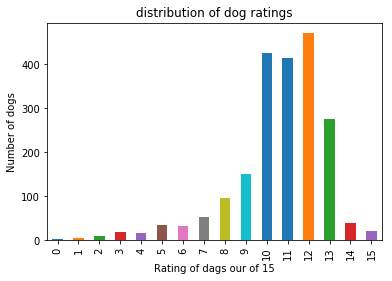

In [70]:
#Lets checkout the dog rating distribution visualization (from insight 1)
plot_chart = wrangled_data['rating_numerator'].value_counts().sort_index().plot(kind='bar', title = 'distribution of dog ratings');
plot_chart.set_xlabel("Rating of dags our of 15");
plot_chart.set_ylabel("Number of dogs");

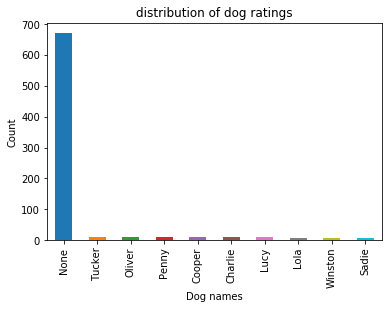

In [82]:
#Lets checkout the dog names distribution from insight 2
plot_chart = wrangled_data['name'].value_counts()[:10].plot(kind='bar', title = 'distribution of dog ratings');
plot_chart.set_xlabel("Dog names");
plot_chart.set_ylabel("Count");

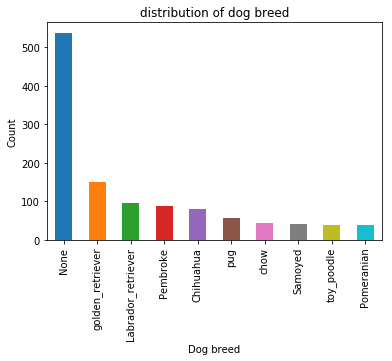

In [83]:
#Lets checkout the dog breed distribution from insight 3

plot_chart = wrangled_data['breed'].value_counts()[:10].plot(kind='bar', title = 'distribution of dog breed');
plot_chart.set_xlabel("Dog breed");
plot_chart.set_ylabel("Count");
